<a href="https://colab.research.google.com/github/BinaryNavigator07/Network-Intrusion-Detection-System/blob/main/CICIDS%202017/2017_feature_extraction_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install seaborn catboost --quiet
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(178)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


In [7]:
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")
print("Dataset folder:", path)

# Find all CSV files in the dataset directory
csv_file_names = [f for f in os.listdir(path) if f.endswith(".csv")]
print(f"Found {len(csv_file_names)} CSV files.")

dfs = []
for file_name in csv_file_names:
    file_path = os.path.join(path, file_name)
    print("Loading:", file_path)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Combine all files into one DataFrame
full_df = pd.concat(dfs, ignore_index=True)
print("Shape of combined data:", full_df.shape)

# Preview
full_df.head()


Dataset folder: /kaggle/input/network-intrusion-dataset
Found 8 CSV files.
Loading: /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Loading: /kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv
Shape of combined data: (2830743, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [10]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [11]:
df[' Label'].nunique()

6

### Data Cleaning

In [12]:

from itertools import combinations

def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)

    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (692703, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (692703, 69)
1297 rows dropped
Shape after Removing NaN:  (691406, 69)
Shape after dropping duplicates:  (610492, 69)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Total Length of Fwd Packets', 'Subflow Fwd Bytes'), ('Fwd Packet Length Mean', 'Avg Fwd Segment Size'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (610492, 63)


In [13]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count'

In [14]:
df['Label'].value_counts()

,count
Label,
BENIGN,416736
DoS Hulk,172846
DoS GoldenEye,10286
DoS slowloris,5385
DoS Slowhttptest,5228
Heartbleed,11


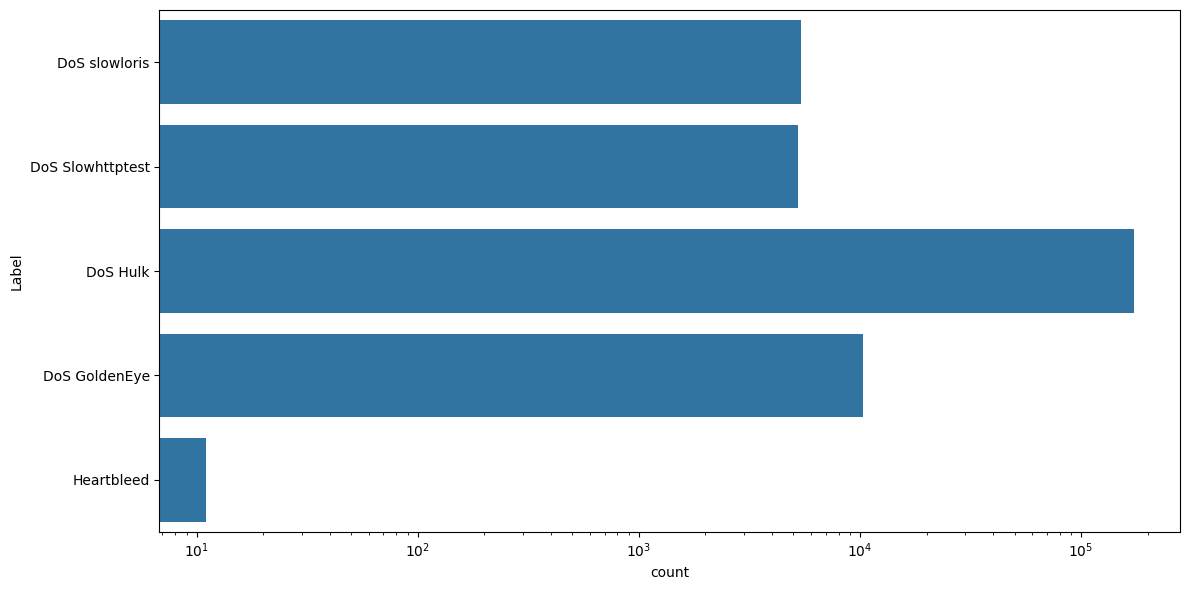

In [15]:
# Install Seaborn if not already installed
!pip install seaborn --quiet

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Make sure 'Label' column exists in your DataFrame
plot = sns.countplot(
    data=df.loc[df['Label'] != 'BENIGN'],
    y='Label'
)

plt.xscale('log')
plt.tight_layout()

# Save the plot
fig = plot.get_figure()
fig.savefig('img1.png')

plt.show()

### Data Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

# Feature / target split
X = df.drop('Label', axis=1)
y = df['Label']

# Min-Max scaling for features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# One-hot encoding for the label (compatible with all versions)
try:
    encoder = OneHotEncoder(sparse_output=False)  # New versions
except TypeError:
    encoder = OneHotEncoder(sparse=False)  # Old versions

y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded = pd.DataFrame(
    y_encoded,
    columns=encoder.get_feature_names_out(['Label'])
)

print("X_scaled shape:", X_scaled.shape)
print("y_encoded shape:", y_encoded.shape)


X_scaled shape: (610492, 62)
y_encoded shape: (610492, 6)


In [19]:
X_scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001222,3.192333e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005940,3.991667e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004892,...,0.000020,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001344,9.125000e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.098389,...,0.000015,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005940,1.267167e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.066226,...,0.000051,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001344,9.100000e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.108024,...,0.000010,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610487,0.000809,2.684583e-04,0.000015,0.000007,0.000091,2.424242e-07,0.001128,0.013559,0.006033,0.000000,...,0.000015,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610488,0.000809,2.700000e-06,0.000005,0.000007,0.000069,5.773525e-07,0.001692,0.020339,0.009050,0.000000,...,0.000005,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610489,0.886130,6.833333e-07,0.000005,0.000004,0.000025,9.569378e-09,0.001249,0.000000,0.003340,0.003409,...,0.000000,0.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610490,0.000809,8.738625e-03,0.000025,0.000007,0.000157,4.082935e-07,0.001289,0.015496,0.006895,0.000000,...,0.000025,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_encoded

,Label_BENIGN,Label_DoS GoldenEye,Label_DoS Hulk,Label_DoS Slowhttptest,Label_DoS slowloris,Label_Heartbleed
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
610487,1.0,0.0,0.0,0.0,0.0,0.0
610488,1.0,0.0,0.0,0.0,0.0,0.0
610489,1.0,0.0,0.0,0.0,0.0,0.0
610490,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Combine the scaled features and the one-hot encoded label
df = pd.concat([X_scaled, y_encoded], axis=1)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label_BENIGN,Label_DoS GoldenEye,Label_DoS Hulk,Label_DoS Slowhttptest,Label_DoS slowloris,Label_Heartbleed
0,0.001222,3.192333e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005940,3.991667e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.001344,9.125000e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.098389,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.005940,1.267167e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.066226,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.001344,9.100000e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.108024,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610487,0.000809,2.684583e-04,0.000015,0.000007,0.000091,2.424242e-07,0.001128,0.013559,0.006033,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
610488,0.000809,2.700000e-06,0.000005,0.000007,0.000069,5.773525e-07,0.001692,0.020339,0.009050,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
610489,0.886130,6.833333e-07,0.000005,0.000004,0.000025,9.569378e-09,0.001249,0.000000,0.003340,0.003409,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
610490,0.000809,8.738625e-03,0.000025,0.000007,0.000157,4.082935e-07,0.001289,0.015496,0.006895,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_encoded,test_size=0.2)
print(X_train.shape," ",X_test.shape)
print(y_train.shape," ",y_test.shape)

(488393, 62)   (122099, 62)
(488393, 6)   (122099, 6)


In [23]:
X_train

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
24188,0.000809,8.550625e-02,0.000005,0.000007,0.000077,3.460925e-07,0.002095,0.020339,0.010128,0.001100,...,0.000005,0.533333,0.000006,0.0,0.000005,0.000006,0.085000,0.0,0.085000,0.085000
287433,0.000809,1.625000e-06,0.000005,0.000007,0.000064,2.870813e-07,0.001571,0.018886,0.008404,0.000000,...,0.000005,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
528841,0.000809,3.750067e-03,0.000005,0.000007,0.000051,2.519936e-07,0.001249,0.015012,0.006680,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
184260,0.001222,7.136228e-01,0.000025,0.000015,0.000242,1.849282e-05,0.011926,0.000000,0.010630,0.018796,...,0.000005,0.533333,0.000004,0.0,0.000004,0.000004,0.712500,0.0,0.712500,0.712500
406145,0.000809,8.771508e-01,0.000005,0.000007,0.000103,4.226475e-07,0.003022,0.024697,0.013575,0.002640,...,0.000005,0.533333,0.000004,0.0,0.000004,0.000004,0.875000,0.0,0.875000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414099,0.006765,3.333333e-08,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
517897,0.000809,5.124750e-04,0.000005,0.000007,0.000052,8.484848e-07,0.001289,0.015496,0.006895,0.000000,...,0.000005,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
153708,0.001222,1.025250e-04,0.000005,0.000007,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
232668,0.001222,7.145513e-01,0.000025,0.000018,0.000295,1.849282e-05,0.014545,0.000000,0.012965,0.022923,...,0.000005,0.533333,0.000010,0.0,0.000009,0.000010,0.713333,0.0,0.713333,0.713333


In [24]:
X_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
439071,0.892498,3.333333e-08,0.000005,0.000000,0.000010,0.000000e+00,0.000242,0.002906,0.001293,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
307486,0.006765,3.695033e-03,0.000059,0.000040,0.000436,6.727273e-06,0.008098,0.000000,0.008851,0.010697,...,0.000025,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
101961,0.001222,8.322397e-01,0.000029,0.000022,0.000266,1.849282e-05,0.013135,0.000000,0.010035,0.019165,...,0.000005,0.533333,0.000007,0.0,0.000007,0.000007,0.831667,0.0,0.831667,0.831667
183506,0.001222,8.227480e-01,0.000020,0.000026,0.000309,1.849282e-05,0.014746,0.000000,0.016290,0.025255,...,0.000010,0.333333,0.000130,0.0,0.000124,0.000130,0.821667,0.0,0.821667,0.821667
453748,0.000809,1.500000e-06,0.000005,0.000007,0.000077,3.285486e-07,0.001894,0.022760,0.010128,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353780,0.000809,2.400575e-03,0.000005,0.000007,0.000065,6.124402e-07,0.001612,0.019370,0.008619,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
52676,0.000809,2.540500e-04,0.000000,0.000004,0.000042,2.073365e-07,0.002095,0.025182,0.011205,0.000000,...,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
139601,0.001222,7.021260e-01,0.000020,0.000026,0.000270,1.849282e-05,0.012853,0.000000,0.014265,0.021986,...,0.000010,0.333333,0.000100,0.0,0.000095,0.000100,0.700833,0.0,0.700833,0.700833
487148,0.000809,3.970417e-04,0.000005,0.000007,0.000057,1.103668e-06,0.001410,0.016949,0.007542,0.000000,...,0.000005,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [25]:
y_train

,Label_BENIGN,Label_DoS GoldenEye,Label_DoS Hulk,Label_DoS Slowhttptest,Label_DoS slowloris,Label_Heartbleed
24188,1.0,0.0,0.0,0.0,0.0,0.0
287433,1.0,0.0,0.0,0.0,0.0,0.0
528841,1.0,0.0,0.0,0.0,0.0,0.0
184260,0.0,0.0,1.0,0.0,0.0,0.0
406145,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
414099,1.0,0.0,0.0,0.0,0.0,0.0
517897,1.0,0.0,0.0,0.0,0.0,0.0
153708,0.0,0.0,1.0,0.0,0.0,0.0
232668,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
y_test

,Label_BENIGN,Label_DoS GoldenEye,Label_DoS Hulk,Label_DoS Slowhttptest,Label_DoS slowloris,Label_Heartbleed
439071,1.0,0.0,0.0,0.0,0.0,0.0
307486,1.0,0.0,0.0,0.0,0.0,0.0
101961,0.0,0.0,1.0,0.0,0.0,0.0
183506,0.0,0.0,1.0,0.0,0.0,0.0
453748,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
353780,1.0,0.0,0.0,0.0,0.0,0.0
52676,1.0,0.0,0.0,0.0,0.0,0.0
139601,0.0,0.0,1.0,0.0,0.0,0.0
487148,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#selecting 1% of random rows for better running time

X_train = X_train.sample(frac=0.1, replace=True, random_state=1)
y_train = y_train.sample(frac=0.1, replace=True, random_state=1)
X_test = X_test.sample(frac=0.1, replace=True, random_state=1)
y_test = y_test.sample(frac=0.1, replace=True, random_state=1)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(48839, 62) (48839, 6)
(12210, 62) (12210, 6)


### Feature extraction using Random Forest

In [28]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
sel.get_support()

X_train.columns

features = X_train.columns[sel.get_support()]
print(features)

print(len(features))

np.mean(sel.estimator_.feature_importances_)
print(sel.estimator_.feature_importances_)

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

Index(['Total Length of Bwd Packets', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'Average Packet Size', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes',
       'Idle Max', 'Idle Min'],
      dtype='object')
17
[0.01522734 0.01073752 0.00562085 0.00494963 0.00419373 0.02849434
 0.00583099 0.0008754  0.00560014 0.0025807  0.06173165 0.00056181
 0.06541286 0.11818331 0.0047887  0.01068058 0.00822017 0.02117075
 0.01988955 0.00383104 0.00766548 0.00917082 0.02812014 0.02202754
 0.00557653 0.00178291 0.00204614 0.00248562 0.00305951 0.00188592
 0.00081808 0.01027941 0.0047349  0.0116009  0.00435338 0.00188093
 0.05862768 0.06466012 0.06523091 0.02896381 0.00813208 0.
 0.0014487  0.00132431 0.00054429 0.         0.00158335 0.02756425
 0.101483   0.03750293 0.00855212 0.00779174 0.001886

### Random Forest

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [30]:
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9934479934479934
Precision:  0.993762897390791
Recall:  0.9934479934479934
F1 score:  0.9935989040187007


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Decision Tree

In [31]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [32]:
run_decisionTree(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9923832923832924
Precision:  0.9928998787152041
Recall:  0.9923832923832924
F1 score:  0.9926157291310275


### Extreme-Gradient Boosting(XGBoost)

In [33]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    clf = xgb.XGBClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))

In [34]:
run_XGBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9937755937755938
Precision:  0.994919936925619
Recall:  0.9941850941850942
F1 score:  0.9945478282670627


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Cat Boost

In [35]:
from sklearn.metrics import classification_report
def run_catBoost(X_train, X_test, y_train, y_test):
    y_train_labels = y_train.idxmax(axis=1)
    y_test_labels = y_test.idxmax(axis=1)
    clf = CatBoostClassifier(iterations=100, random_state=0, verbose=0)
    clf.fit(X_train, y_train_labels, cat_features=[], verbose=0)
    y_pred_labels = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test_labels, y_pred_labels))
    print('Precision: ', precision_score(y_test_labels, y_pred_labels, average='weighted'))
    print('Recall: ', recall_score(y_test_labels, y_pred_labels, average='weighted'))
    print('F1 score: ', f1_score(y_test_labels, y_pred_labels, average='weighted'))

In [ ]:
run_catBoost(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


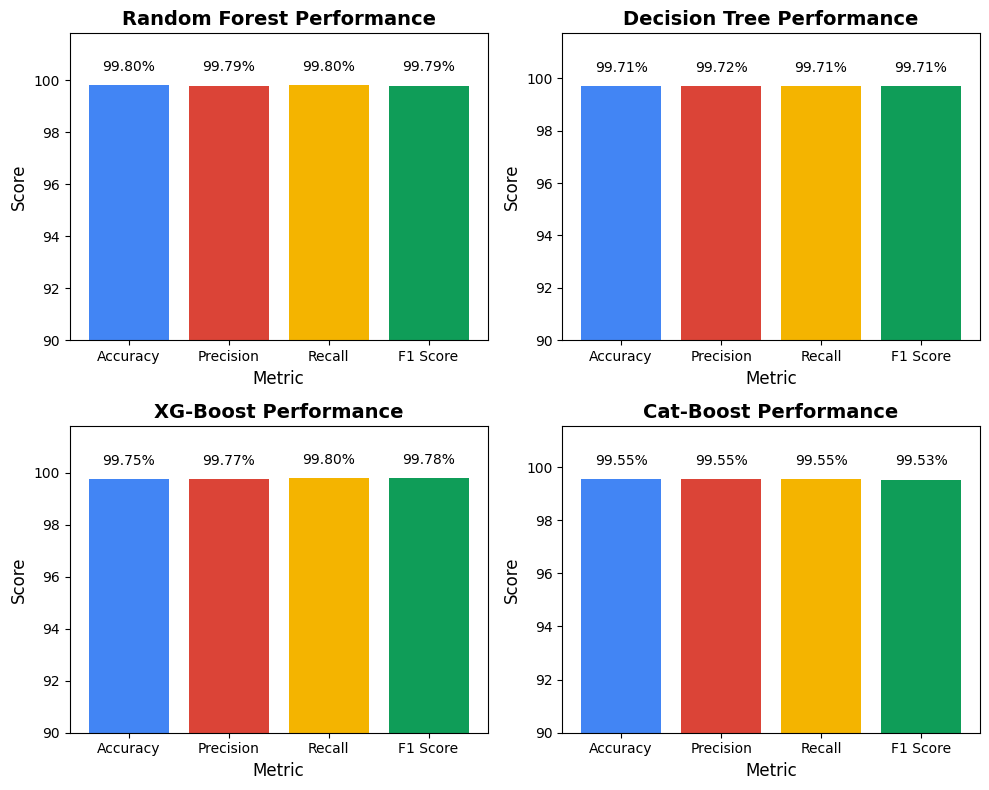

In [36]:
models = ['Random Forest', 'Decision Tree', 'XG-Boost', 'Cat-Boost']
random_forest = [99.80, 99.79, 99.80, 99.79]
decision_tree = [99.71, 99.72, 99.71, 99.71]
xgboost = [99.75, 99.77, 99.80, 99.78]
catboost = [99.55, 99.55, 99.55, 99.53]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [random_forest, decision_tree, xgboost, catboost]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (model, ax) in enumerate(zip(models, axs)):
    max_value = max(values[i]) + 2
    ax.bar(metrics, values[i], color=['#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
    ax.set_title(f'{model} Performance', fontsize=14, fontweight='bold')
    ax.set_ylim(90, max_value)


    for j, v in enumerate(values[i]):
        ax.annotate(f'{v:.2f}%', xy=(j, v), xytext=(0, 8),
                    textcoords="offset points", ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

plt.tight_layout()
plt.show()